In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rmapy as rma
import timeit
import gc

from memory_profiler import memory_usage
from pyunicorn.timeseries import RecurrencePlot

In [2]:
##
##      Funções de teste
##
def rma_test(data, threshold):
    dist = rma.distribution(data, threshold, 3)

    rr = rma.rate(dist)
    det = rma.determinism(data, threshold)
    lam = rma.laminarity(data, threshold)

    return (rr, det, lam)

def std_test(data, threshold):
    rp = RecurrencePlot(data, threshold = threshold, normalize = False)

    rr = rp.recurrence_rate()
    det = rp.determinism()
    lam = rp.laminarity()

    return (rr, det, lam)

In [3]:
##
##      Sistemas para teste
##
def uniform(len):
    return np.random.uniform(0, 1, size = len).astype(np.float64)


In [4]:
##
##      Executa os testes de performace
##
def performance_test(runs, data_gen, threshold, min_len = 1000, max_len = 8000, dist_sz = 10):
    times_rma = []
    memor_rma = []

    times_std = []
    memor_std = []

    for len in range(min_len, max_len, round((max_len - min_len) / runs)):
        dist_t_rma = []
        dist_m_rma = []

        dist_t_std = []
        dist_m_std = []

        print(f"Running to {len}.")

        for _ in range(0, dist_sz):

            data = data_gen(len)

            def wrapper_rma():
                rma_test(data, threshold)
                
            def wrapper_std():
                std_test(data, threshold)

            dist_t_rma.append(timeit.timeit(wrapper_rma, number = 1))
            dist_t_std.append(timeit.timeit(wrapper_std, number = 1))

            dist_m_rma.append(memory_usage((wrapper_rma,), max_usage = True))
            dist_m_std.append(memory_usage((wrapper_std,), max_usage = True))

            gc.collect()

        times_rma.append(np.mean(dist_t_rma))
        times_std.append(np.mean(dist_t_std))

        memor_rma.append(np.mean(dist_m_rma))
        memor_std.append(np.mean(dist_m_std))

    return (times_rma, memor_rma, times_std, memor_std)

In [5]:
performance_result = performance_test(30, uniform, 0.27)

Running to 1000.
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed thresh

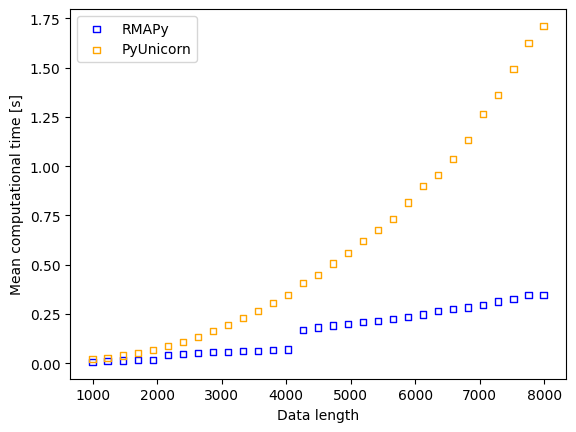

In [6]:
plt.scatter(range(1000, 8000, round((8000 - 1000) / 30)), performance_result[0], label = 'RMAPy', marker = 's', facecolors = 'none', edgecolors = 'blue', s = 20)
plt.scatter(range(1000, 8000, round((8000 - 1000) / 30)), performance_result[2], label = 'PyUnicorn', marker = 's', facecolors = 'none', edgecolors = 'orange', s = 20)

plt.xlabel('Data length')
plt.ylabel('Mean computational time [s]')

plt.legend()
plt.show()